Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.7648 - loss: 0.7600 - val_accuracy: 0.9782 - val_loss: 0.0829
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9637 - loss: 0.1230 - val_accuracy: 0.9848 - val_loss: 0.0585
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.9732 - loss: 0.0867 - val_accuracy: 0.9862 - val_loss: 0.0472
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 94ms/step - accuracy: 0.9769 - loss: 0.0733 - val_accuracy: 0.9880 - val_loss: 0.0438
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.9794 - loss: 0.0632 - val_accuracy: 0.9907 - val_loss: 0.0363


Saving sete.jpg to sete.jpg
Saving dois.jpg to dois.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


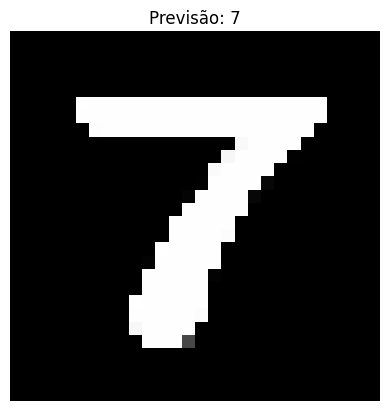

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


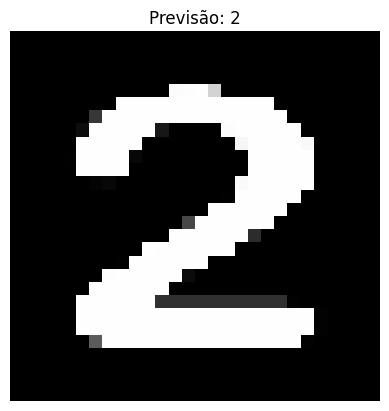

In [3]:
# Convolutional Neural Network modelo trained with MNIST dataset.

import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow import keras
from keras import layers

# Load trained MNIST model
model = keras.Sequential([ # Sequential model
    keras.Input(shape=(28, 28, 1)), # Gray scale images 28x28 1 channel
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # Conv. layer w/ 32 filters, each 3x3 with ReLU
    layers.MaxPooling2D(pool_size=(2, 2)), # Max pooling (subsampling layer) with 2x2 window
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # Second conv. layer w/ 64 filters
    layers.MaxPooling2D(pool_size=(2, 2)), # Second subsamplung layer
    layers.Flatten(), # "Flatten" 2D output to 1D
    layers.Dropout(0.5), # Avoid overfitting
    layers.Dense(10, activation="softmax"), # 10 neuron (one for each digit) and software for classification
])

# Configure test and train
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Compile and train model with 5 epochs
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

uploaded = files.upload()

# Process and predict each image
for fn in uploaded.keys():
    image = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (28, 28))
    image = cv2.bitwise_not(image)
    image = image.astype("float32") / 255
    image = np.expand_dims(image, axis=-1)  # Expand to 3 dimensions
    image = np.expand_dims(image, axis=0)   # Expand to 4 dimensions (batch)

    # Predict digit
    prediction = model.predict(image)
    predicted_digit = np.argmax(prediction)

    plt.imshow(image[0, :, :, 0], cmap='gray')
    plt.title(f'Previsão: {predicted_digit}')
    plt.axis('off')
    plt.show()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 332,801 (1.27 MB)

 Trainable params: 332,801 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 499s 2s/step - loss: 0.2037 - val_loss: 0.0746
Epoch 2/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 508s 2s/step - loss: 0.0741 - val_loss: 0.0698
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step


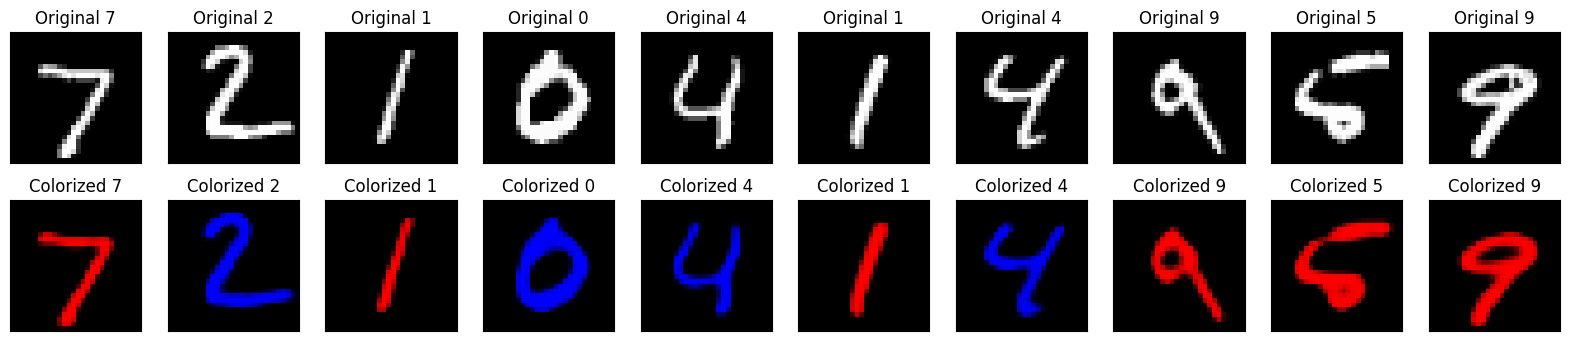

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Carregar o conjunto de dados MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the dados for value between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

X_train = x_train.reshape(-1, 28, 28, 1)
X_test = x_test.reshape(-1, 28, 28, 1)

# Define Autoencoder (p/ diminuir perda de reconstrução)
model = models.Sequential()

# Conv. Encoder (Reduz a entrada para um vetor de características de baixa dimensão)
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

# Decoder (Reconstrói a entrada original a partir do vetor comprimido gerado pelo encoder)
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))  # Saída com 1 canal

# Model compile
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

# Autoencoder training
model.fit(x_train, x_train, epochs=2, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Reconstruct/color images
decoded_imgs = model.predict(x_test)
colorized_imgs = np.zeros((decoded_imgs.shape[0], 28, 28, 3))  # 3 channels

for i in range(decoded_imgs.shape[0]):
    if y_test[i] % 2 == 0:
        colorized_imgs[i, :, :, 2] = decoded_imgs[i, :, :, 0]  # B
    else:
        colorized_imgs[i, :, :, 0] = decoded_imgs[i, :, :, 0]  # R

# Results
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Original {y_test[i]}")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(colorized_imgs[i])
    plt.title(f"Colorized {y_test[i]}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
